### Attempting to remove stopwords before splitting the line lyrics by Token
#### Unsuccessful

In [123]:
# Import libraries and upload OHCO (by line) #
import pandas as pd
import numpy as np
import os

df = pd.read_csv('artist_song_verse_line_OHCO_df.csv') # includes corpus with no duplicate song names

In [124]:
df.head()

,artist_id,song_id,verse_num,line_num,Line
0,0,0,0,0,"Look at her face, it's a wonderful face"
1,0,0,0,1,And it means something special to me
2,0,0,0,2,Look at the way that she smiles when she sees me
3,0,0,0,3,How lucky can one fellow be?
4,0,0,1,0,"She's just my kind of girl, she makes me feel ..."


In [125]:
# Try the method on a subset first
sub = df[df['artist_id']==261]

In [126]:
sub=sub.set_index(['artist_id', 'song_id','verse_num','line_num'])

In [127]:
TOKEN_PAT = r'(\W+)'
tokens = sub.Line.str.split(TOKEN_PAT, expand=True)\
    .stack()\
    .to_frame()\
    .rename(columns={0:'token_str'})
tokens.index.names = ['artist_id', 'song_id','verse_num','line_num','token_num']
tokens['punc'] = tokens.token_str.str.match(r'^\W*$').astype('int')

In [128]:
tokens.head()

token_str  punc
artist_id song_id verse_num line_num token_num                
261       17342   0         0        0                It     0
                                     1                 '     1
                                     2                 s     0
                                     3                       1
                                     4              what     0

In [129]:
#remove punctuation
no_punc = tokens[tokens.punc == 0]

In [130]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [131]:
stemmer = nltk.stem.porter.PorterStemmer()
no_punc['port_stem'] = no_punc.token_str.apply(lambda x: stemmer.stem(x))

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [132]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [133]:
no_stop=pd.DataFrame(no_punc[-no_punc.port_stem.isin(stop)])

In [139]:
no_stop.head()

token_str  punc port_stem
artist_id song_id verse_num line_num token_num                          
261       17342   0         0        0                It     0        It
                                     12          waiting     0      wait
                            1        2            people     0     peopl
                                     4               pay     0       pay
                                     6             paper     0     paper

In [140]:
token_counts = no_stop[tokens.punc == 0].port_stem.str.lower().value_counts()

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [141]:
token_counts.head()

i       1504
know     272
like     241
get      206
oh       194
Name: port_stem, dtype: int64

In [142]:
vocab = no_stop[tokens.punc == 0].port_stem.value_counts().to_frame()\
    .reset_index()\
    .rename(columns={'index':'port_stem', 'port_stem':'n'})
vocab = vocab.sort_values('port_stem').reset_index()
vocab.index.name = 'term_id'
vocab = vocab.drop('index', 1)

C:\Users\karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [143]:
vocab.sort_values('n', ascending=False).head(25)

,port_stem,n
term_id,,
66,I,1504
1573,know,272
1649,like,241
1188,get,206
1960,oh,161
1230,got,153
2813,thi,151
1692,love,147
1923,nigga,123


In [144]:
K=no_stop

In [145]:
K

token_str  punc   port_stem
artist_id song_id verse_num line_num token_num                                
261       17342   0         0        0                    It     0          It
                                     12              waiting     0        wait
                            1        2                people     0       peopl
                                     4                   pay     0         pay
                                     6                 paper     0       paper
                                     10                 damn     0        damn
                                     20                stand     0       stand
                            2        2                  want     0        want
                                     4             something     0      someth
                                     6                   new     0         new
                                     10                  let     0         let
                                     14                  get     0         get
                                     16         reacquainted     0  reacquaint
                            3        0                Became     0       becam
                                     4                  hood     0        hood
                                     6              favorite     0     favorit
                                     8                     I     0           I
                                     14                 even     0        even
                                     16              explain     0     explain
                                     20                    I     0           I
                                     22             surprise     0     surpris
                            4        0                  Life     0        life
                                     8                lights     0       light
                                     10                 keep     0        keep
                                     12              glowing     0        glow
                            5        0                Coming     0        come
                                     6                  club     0        club
                                     12                fresh     0       fresh
                                     14                 shit     0        shit
                            6        2             something     0      someth
...                                                      ...   ...         ...
          17407   3         26       6                 stunt     0       stunt
                                     10                 stay     0        stay
                                     12             glorious     0     gloriou
                            27       2                     I     0           I
                                     6                 gonna     0       gonna
                                     8                  stop     0        stop
                                     10              killing     0        kill
                                     14               niggas     0       nigga
                                     16                 soon     0        soon
                                     22               chorus     0       choru
                                     24                  hit     0         hit
                  4         0        6                 south     0       south
                                     8                  side     0        side
                                     16                 west     0        west
                                     18                 side     0        side
                  5         0        0                  Yeah     0        yeah
                                     2                     I     0           I
                                     6                  stop     0        stop
                      

In [146]:
K['term_id'] = K['port_stem'].map(V.reset_index().set_index('port_stem').term_id).fillna(-1).astype('int')

In [147]:
V=vocab

In [148]:
OHCO = ['artist_id', 'song_id', 'verse_num', 'line_num','token_num']

In [149]:
SONG=OHCO[1:2]

In [150]:
SONG

['song_id']

In [151]:
BOW = K.groupby(SONG+['term_id'])['term_id'].count()

In [152]:
BOW.head()

song_id  term_id
17342    -1         108
          12         31
          16          1
          18          1
          21          1
Name: term_id, dtype: int64

In [153]:
DTM = BOW.unstack().fillna(0)

In [154]:
DTM

term_id,-1,0,2,3,4,5,7,10,11,12,...,1597,1598,1600,1601,1603,1604,1605,1606,1608,1609
song_id,,,,,,,,,,,,,,,,,,,,,
17342,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
17343,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17344,107.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
17345,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17346,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,...,1.0,0.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
17347,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17348,74.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0
17349,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17350,172.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,...,0.0,0.0,27.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [155]:
alpha = .000001 # We introduce an arbitrary smoothing value
alpha_sum = alpha * V.shape[0]
TF = DTM.apply(lambda x: (x + alpha) / (x.sum() + alpha_sum), axis=1)

In [156]:
TF.head()

term_id,-1,0,2,3,4,5,7,10,11,12,...,1597,1598,1600,1601,1603,1604,1605,1606,1608,1609
song_id,,,,,,,,,,,,,,,,,,,,,
17342,0.371130,3.436389e-09,3.436389e-09,3.436389e-09,3.436389e-09,3.436389e-09,3.436389e-09,3.436389e-09,3.436389e-09,0.106528,...,3.436389e-09,3.436389e-09,3.436389e-09,3.436389e-09,3.436389e-09,1.030917e-02,3.436392e-03,3.436389e-09,3.436389e-09,3.436389e-09
17343,0.398428,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,0.062498,...,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09,7.812307e-09
17344,0.317504,2.967334e-03,2.967331e-09,2.967331e-09,2.967331e-09,2.967331e-09,2.967331e-09,2.967331e-09,2.967331e-09,0.065281,...,2.967331e-09,2.967331e-09,2.967331e-09,2.967331e-09,2.967334e-03,5.934665e-03,2.967331e-09,2.967331e-09,2.967331e-09,2.967331e-09
17345,0.413771,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,0.034481,...,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08,1.724044e-08
17346,0.364072,4.854294e-09,4.854294e-09,4.854294e-09,4.854294e-09,4.854294e-09,4.854294e-09,4.854294e-09,4.854294e-09,0.077669,...,4.854299e-03,4.854294e-09,3.883436e-02,4.854294e-09,4.854294e-09,9.708593e-03,4.854294e-09,4.854294e-09,4.854294e-09,4.854294e-09


In [157]:
N_docs = DTM.shape[0]
V['df'] = DTM[DTM > 0].count()
TFIDF = TF * np.log2(N_docs / V['df'])

In [158]:
TFIDF.head()

term_id,-1,0,1,2,3,4,5,6,7,8,...,3157,3158,3159,3160,3161,3162,3163,3164,3165,3166
song_id,,,,,,,,,,,,,,,,,,,,,
17342,NaN,6.173358e-09,NaN,1.733450e-08,1.279184e-08,1.532434e-08,1.733450e-08,NaN,1.046172e-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17343,NaN,1.403455e-08,NaN,3.940835e-08,2.908105e-08,3.483845e-08,3.940835e-08,NaN,2.378374e-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17344,NaN,5.330717e-03,NaN,1.496839e-08,1.104579e-08,1.323261e-08,1.496839e-08,NaN,9.033726e-09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17345,NaN,3.097187e-08,NaN,8.696756e-08,6.417694e-08,7.688255e-08,8.696756e-08,NaN,5.248669e-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17346,NaN,8.720578e-09,NaN,2.448697e-08,1.806995e-08,2.164739e-08,2.448697e-08,NaN,1.477839e-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
THM = -(TF * np.log2(TF))
TFTH = TF.apply(lambda x: x * THM.sum(), 1)

In [160]:
V['tf_sum'] = TF.sum()
V['tf_mean'] = TF.mean()
V['tf_max'] = TF.max()
V['tfidf_sum'] = TFIDF.sum()
V['tfidf_mean'] = TFIDF.mean()
V['tfidf_max'] = TFIDF.max()
V['tfth_sum'] = TFTH.sum()
V['tfth_mean'] = TFTH.mean()
V['tfth_max'] = TFTH.max()
V['th_sum'] = THM.sum()
V['th_mean'] = THM.mean()
V['th_max'] = THM.max()

In [161]:
V

,port_stem,n,df,tf_sum,tf_mean,tf_max,tfidf_sum,tfidf_mean,tfidf_max,tfth_sum,tfth_mean,tfth_max,th_sum,th_mean,th_max
term_id,,,,,,,,,,,,,,,
0,0,1,19.0,0.091222,0.001382,0.014184,0.163877,0.002483,0.025481,0.061986,0.000939,0.009638,0.679510,0.010296,0.087084
1,1,7,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,2.0,0.007110,0.000108,0.003788,0.035868,0.000543,0.019107,0.000411,0.000006,0.000219,0.057834,0.000876,0.030471
3,11,2,5.0,0.030615,0.000464,0.013100,0.113964,0.001727,0.048765,0.006665,0.000101,0.002852,0.217692,0.003298,0.081932
4,15,1,3.0,0.009519,0.000144,0.003817,0.042448,0.000643,0.017021,0.000751,0.000011,0.000301,0.078872,0.001195,0.030662
5,2,6,2.0,0.005999,0.000091,0.003460,0.030259,0.000458,0.017454,0.000301,0.000005,0.000174,0.050179,0.000760,0.028287
6,20,1,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2003,1,8.0,0.064961,0.000984,0.028985,0.197767,0.002996,0.088242,0.027065,0.000410,0.012076,0.416631,0.006313,0.148072
8,2010,1,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
#Find significant words

In [163]:
TOPS = pd.DataFrame(index=range(10))
for m in ['tf','tfidf','tfth', 'th']:
    for n in ['mean','max']:
        key = '{}_{}'.format(m,n)
        TOPS[key] = V.sort_values(key, ascending=False).port_stem.head(10).tolist()

In [164]:
TOPS

,tf_mean,tf_max,tfidf_mean,tfidf_max,tfth_mean,tfth_max,th_mean,th_max
0,25,evenin,evenin,idol,25,25,25,evenin
1,dead,25,destin,evenin,dead,dead,dead,25
2,detect,chuch,doc,account,detect,chuch,detect,chuch
3,doc,doc,dealership,know,chuch,evenin,chuch,doc
4,chuch,clearanc,idol,dealership,doc,doc,houston,clearanc
5,houston,idol,fluid,eight,houston,detect,cliqu,idol
6,cliqu,destin,clearanc,cleve,cliqu,cliqu,doc,destin
7,evenin,hollow,dead,boosi,juke,hollow,juke,hollow
8,juke,dead,eight,cab,depend,destin,depend,dead
9,depend,account,emphasi,fluid,cleaner,depend,cleaner,account


In [165]:
#Compare Chapters
#Create Songs Table

In [166]:
def get_songs(tokens, div_names, doc_str = 'term_id', sep='', flatten=False, 
             index_only=False):
    
    if not index_only:
        docs = tokens.groupby(div_names)[doc_str]\
          .apply(lambda x: x.str.cat(sep=sep))
        docs.columns = ['doc_content']
    else:
        docs = tokens.groupby(div_names)[doc_str].apply(lambda x: x.tolist())

    if flatten:
        docs = docs.reset_index().drop(div_names, 1)
    
    return docs

In [167]:
D = get_songs(K, SONG, 'port_stem', sep=" ")\
    .to_frame().rename(columns={'port_stem':'song_str'})

In [168]:
D.head()

,song_str
song_id,
17342,It wait peopl pay paper damn stand want someth...
17343,I know like feel littl girl I hope someon lift...
17344,featur common hook My rap better My plaqu bett...
17345,I hear girl scream soon arrivin ask ibn straig...
17346,feat ludacri hook ludacri yeah breath breath I...


In [169]:
D['term_count'] = DTM.sum(1).astype('int').to_frame().rename(columns={0:'term_count'})
D['tf'] = D.term_count / D.term_count.sum()

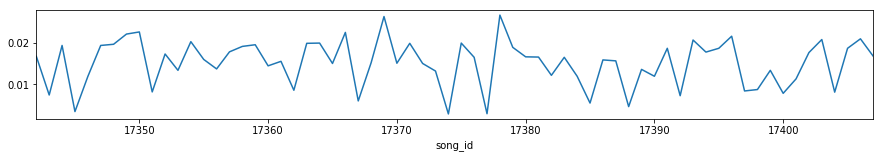

In [170]:
D.tf.plot(figsize=(15,2))

# Get all doc pairs

In [171]:
song_ids = D.index.tolist()
pairs = [(i,j) for i in song_ids for j in song_ids if j > i]

In [172]:
P = pd.DataFrame(pairs).reset_index(drop=True).set_index([0,1])
P.index.names = ['doc_x','doc_y']

In [173]:
P.head()

Empty DataFrame
Columns: []
Index: [(17342, 17343), (17342, 17344), (17342, 17345), (17342, 17346), (17342, 17347)]

# Compute Eucledian Distance

In [174]:
def euclidean(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    x = (D1 - D2)**2
    y = x.sum() 
    z = np.sqrt(y)
    return z

In [175]:
P['euclidean'] = 0
P['euclidean'] = P.apply(euclidean, 1)

In [176]:
P['euclidean_sim'] = 1 / (P.euclidean + 1)
PME = P.euclidean.unstack().fillna(0)
PME.head()

doc_y,17343,17344,17345,17346,17347,17348,17349,17350,17351,17352,...,17398,17399,17400,17401,17402,17403,17404,17405,17406,17407
doc_x,,,,,,,,,,,,,,,,,,,,,
17342,0.268321,0.287236,0.341676,0.352326,0.429904,0.581275,0.219175,0.245486,0.477758,0.264384,...,0.270003,0.246280,0.254087,0.287708,0.332156,0.206083,0.510483,0.206864,0.258823,0.231341
17343,0.000000,0.312737,0.360134,0.366012,0.440941,0.589746,0.242344,0.266316,0.496919,0.285155,...,0.296498,0.275844,0.276390,0.307269,0.361813,0.239034,0.526859,0.227383,0.277577,0.254119
17344,0.000000,0.000000,0.379989,0.391295,0.425574,0.600618,0.274709,0.291916,0.508914,0.312346,...,0.309466,0.296652,0.302460,0.323328,0.376820,0.260053,0.538505,0.263703,0.293197,0.283593
17345,0.000000,0.000000,0.000000,0.424644,0.382913,0.627500,0.323229,0.335962,0.540808,0.357400,...,0.364558,0.350902,0.344063,0.370622,0.415883,0.315377,0.554878,0.310504,0.346466,0.325771
17346,0.000000,0.000000,0.000000,0.000000,0.501536,0.631164,0.338825,0.322091,0.548898,0.373698,...,0.376944,0.352358,0.359289,0.386125,0.428802,0.332828,0.577003,0.326686,0.366522,0.348238


# Compute Cosine Similarity

In [177]:
def cosine(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    x = D1 * D2
    y = x.sum()
    
#     a = np.sqrt(D1.sum()**2)     # <-- misplaced exponent!
#     b = np.sqrt(D2.sum()**2)     # <-- misplaced exponent!
#     c = np.sqrt(a) * np.sqrt(b)  # <-- extra square roots!

    a = np.sqrt((D1**2).sum())
    b = np.sqrt((D2**2).sum())
    c = a * b
    
    z = y / c
    return z

In [178]:
from numpy.linalg import norm
def cosine_np(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    return np.dot(D1, D2)/(norm(D1)*norm(D2))

from scipy import spatial
def cosine_scipy(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    return (1 - spatial.distance.cosine(D1, D2))

from sklearn.metrics.pairwise import cosine_similarity
def cosine_sklearn(row):
    D1 = TFIDF.loc[row.name[0]]
    D2 = TFIDF.loc[row.name[1]]
    return cosine_similarity([TFIDF.loc[0]], [TFIDF.loc[1]])[0][0]


In [183]:

# %%timeit -- 11.8 s ± 958 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
P['cosine'] = P.apply(cosine, 1)

# %%timeit -- 7.23 s ± 877 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
P['cosine_scipy'] = P.apply(cosine_scipy, 1)

# %%timeit -- 39.6 s ± 3.27 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
P['cosine_sklearn'] = P.apply(cosine_sklearn, 1)

# %%timeit -- 4.48 s ± 480 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
P['cosine_np'] = P.apply(cosine_np, 1)

P.head()


KeyError: (0, 'occurred at index (17342, 17343)')

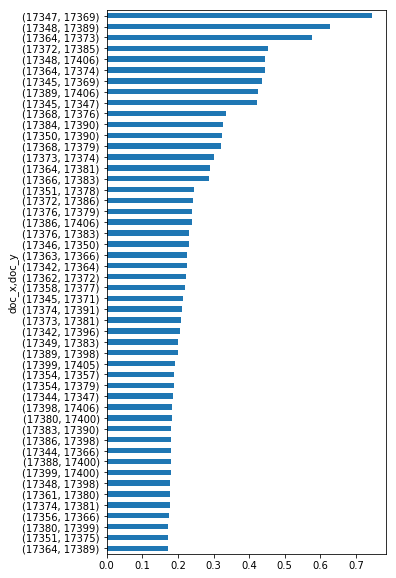

In [182]:
PMC = P.cosine.unstack().fillna(0)
PMC.head()
P.cosine.sort_values(ascending=True).tail(50).plot(kind='barh', figsize=(5,10))